In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the data into a pandas dataframe
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [5]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### Check the male - female ratio

<AxesSubplot:>

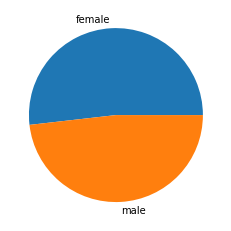

In [6]:
data.groupby('gender').size().plot(kind='pie', label='')

<AxesSubplot:xlabel='gender'>

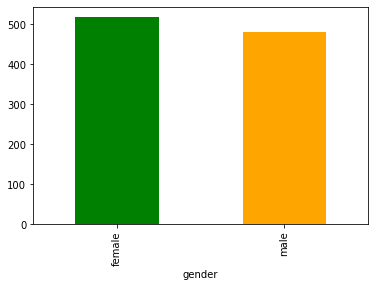

In [95]:
data.groupby('gender').size().plot(kind='bar', color=['green', 'orange'])

In [8]:
data.groupby('gender').size()

gender
female    518
male      482
dtype: int64

#### Check the ethnicity ratio

<AxesSubplot:>

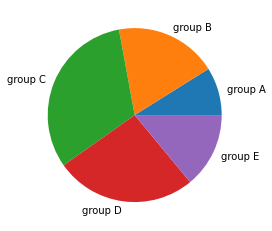

In [9]:
data.groupby('race/ethnicity').size().plot(kind='pie', label='')

Group C makes the largest ethnicity group in the study followed by Group D

<AxesSubplot:ylabel='race/ethnicity'>

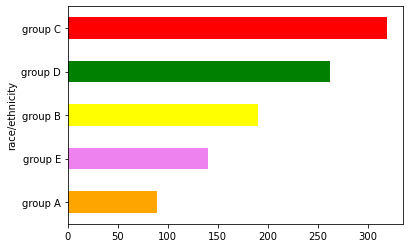

In [83]:
data.groupby('race/ethnicity').size().sort_values().plot(kind='barh', color=['orange', 'violet', 'yellow', 'green', 'red'])

#### Lets compute the average math, reading and writing scores for male and female students

In [11]:
mean_scores_by_gender = data.groupby('gender').aggregate('mean')
print (mean_scores_by_gender)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


<AxesSubplot:xlabel='gender'>

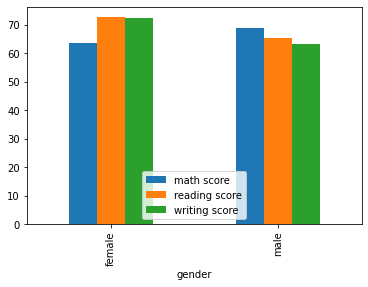

In [12]:
mean_scores_by_gender.plot.bar()

From the above plot we infer that female students have performed better than the male students in reading and writing but not so in math. 

#### Average score for female and male students

In [69]:
data['average score'] = data.apply('mean', axis=1)
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='gender'>

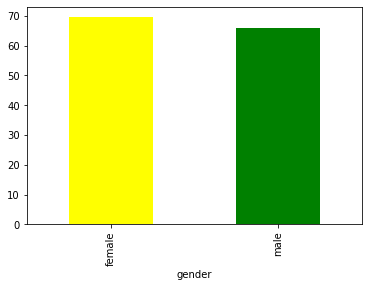

In [82]:
data.groupby('gender')['average score'].aggregate('mean').plot(kind='bar', color=['yellow', 'green'])

On average, girls performed better than boys

#### Compute average scores against each race/ethnicity

In [25]:
mean_scores_by_race = data.groupby('race/ethnicity').aggregate('mean')
print (mean_scores_by_race)

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


<AxesSubplot:xlabel='race/ethnicity'>

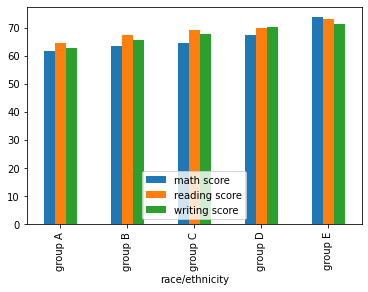

In [14]:
mean_scores_by_race.plot.bar()

Group E seems to have performed better on average than the rest of the groups

#### Check male-female ratio in Group E

<AxesSubplot:>

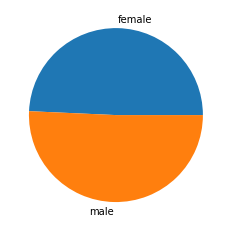

In [32]:
data[data['race/ethnicity']=='group E'].groupby('gender').size().plot(kind='pie', label='')

Equal number of boys and girls in group E

#### Check ratio of parental education in Group E

<AxesSubplot:>

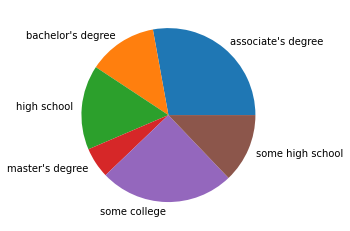

In [33]:
data[data['race/ethnicity']=='group E'].groupby('parental level of education').size().plot(kind='pie', label='')

#### Check the ratio in group E receiving subsidised food

<AxesSubplot:>

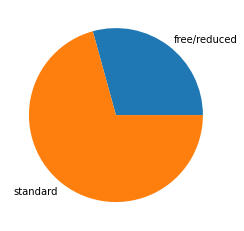

In [37]:
data[data['race/ethnicity']=='group E'].groupby('lunch').size().plot(kind='pie', label='')

Almost 3/4th of Group E students can afford food at standard pricing (not receiving at a subsidised rate)

#### Check ratio of students who received test prep course 

<AxesSubplot:>

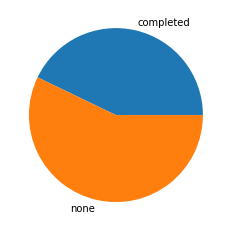

In [38]:
data[data['race/ethnicity']=='group E'].groupby('test preparation course').size().plot(kind='pie', label='')

more than half of group E students didn't take any special test prep course and yet outperformed

#### Check male-female ratio in Group A

<AxesSubplot:>

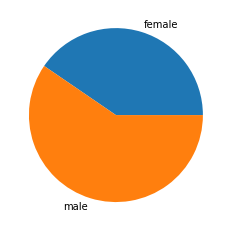

In [39]:
data[data['race/ethnicity']=='group A'].groupby('gender').size().plot(kind='pie', label='')

male students outnumber female students in Group A

#### Check ratio of parental education in Group A

<AxesSubplot:>

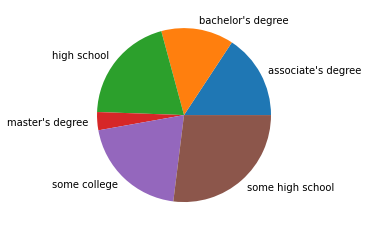

In [41]:
data[data['race/ethnicity']=='group A'].groupby('parental level of education').size().plot(kind='pie', label='')

Parents of most students in Group A are high school passouts without a college degree

#### Check the ratio in group E receiving subsidised food

<AxesSubplot:>

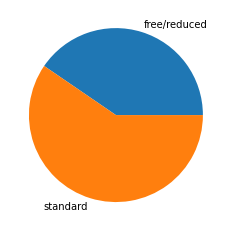

In [42]:
data[data['race/ethnicity']=='group A'].groupby('lunch').size().plot(kind='pie', label='')

#### Check ratio of students who received test prep course

<AxesSubplot:>

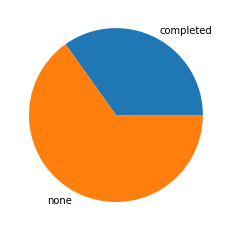

In [43]:
data[data['race/ethnicity']=='group A'].groupby('test preparation course').size().plot(kind='pie', label='')

#### Check correlation between math score and reading score 

<AxesSubplot:xlabel='math score', ylabel='reading score'>

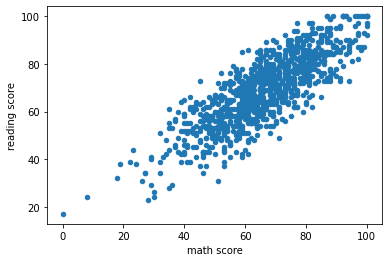

In [45]:
data.plot(x='math score', y='reading score', kind='scatter')

#### Check correlation between math score and writing score 

<AxesSubplot:xlabel='math score', ylabel='writing score'>

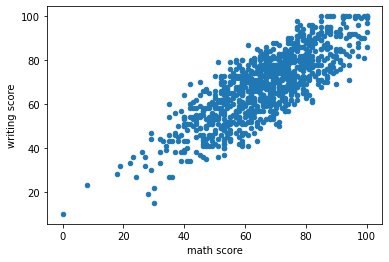

In [46]:
data.plot(x='math score', y='writing score', kind='scatter')

#### Check correlation between reading score and writing score 

<AxesSubplot:xlabel='reading score', ylabel='writing score'>

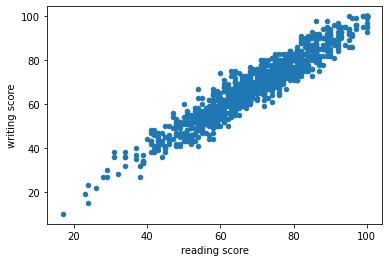

In [47]:
data.plot(x='reading score', y='writing score', kind='scatter')

#### Distribution for math, reading and writing score

In [89]:
def get_distribution_plot(df, column, title):
    plt = df[column].plot(kind='hist', title=title)
    return plt

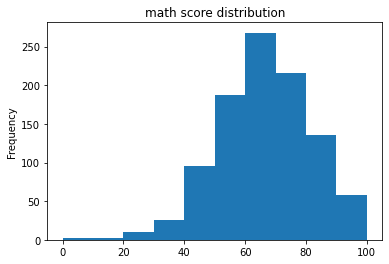

In [92]:
math_score_dist_plot = get_distribution_plot(data,'math score','math score distribution')

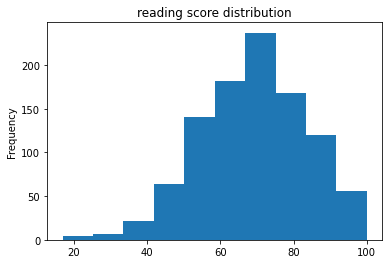

In [91]:
reading_score_dist_plot = get_distribution_plot(data,'reading score','reading score distribution')

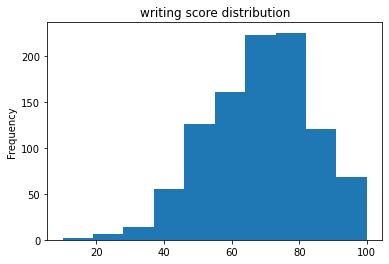

In [93]:
writing_score_dist_plot = get_distribution_plot(data,'writing score','writing score distribution')